<a href="https://colab.research.google.com/github/Anujay26/OIBSIB/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd,re
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import LinearSVC

##LOAD DATA


In [4]:
df=pd.read_csv('Twitter_Data.csv')

In [5]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [6]:
label_map={-1.0:'Negative',0:'Neutral',1:'Positive'}
df['sentiment']=df['category'].map(label_map)
df=df.dropna(subset=['sentiment'])

In [7]:
print('Dataset size: ',len(df))

Dataset size:  162973


In [8]:
display(df.head())

,clean_text,category,sentiment
0,when modi promised “minimum government maximum...,-1.0,Negative
1,talk all the nonsense and continue all the dra...,0.0,Neutral
2,what did just say vote for modi welcome bjp t...,1.0,Positive
3,asking his supporters prefix chowkidar their n...,1.0,Positive
4,answer who among these the most powerful world...,1.0,Positive


In [9]:
counts=df['sentiment'].value_counts()
print(counts)

sentiment
Positive    72250
Neutral     55213
Negative    35510
Name: count, dtype: int64


Text(0, 0.5, 'Frequency')

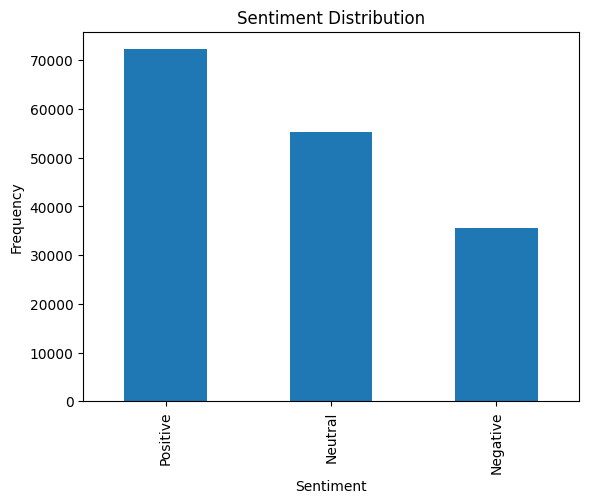

In [10]:
barplot=counts.plot(kind='bar',title='Sentiment Distribution')
barplot.set_xlabel('Sentiment')
barplot.set_ylabel('Frequency')

In [11]:
def preprocess(text):
  text = str(text).lower()
  text = re.sub(r'http\S+', '', text)
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'[^a-z\s]', ' ', text)
  text = re.sub(r'\s+', ' ', text).strip()
  return text

In [12]:
df['clean']=df['clean_text'].apply(preprocess)

In [13]:
X_train,X_test,y_train,y_test=train_test_split(df['clean'],df['sentiment'],test_size=0.2,random_state=42,stratify=df['sentiment'])

In [14]:
tfidf=TfidfVectorizer(stop_words='english',max_features=10000,ngram_range=(1,2))
X_train_vec=tfidf.fit_transform(X_train)
X_test_vec=tfidf.transform(X_test)

In [15]:
models={'MultinomialNB':MultinomialNB(),'LinearSVC':LinearSVC()}


In [16]:
results={}
for name, model in models.items():
    model.fit(X_train_vec, y_train)
    preds = model.predict(X_test_vec)
    results[name] = classification_report(y_test, preds, digits=3, output_dict=True)
    print('\n' + '='*40 + f'\n{name} performance')
    print(classification_report(y_test, preds, digits=3))


MultinomialNB performance
              precision    recall  f1-score   support

    Negative      0.810     0.486     0.607      7102
     Neutral      0.774     0.673     0.720     11043
    Positive      0.668     0.866     0.755     14450

    accuracy                          0.718     32595
   macro avg      0.751     0.675     0.694     32595
weighted avg      0.735     0.718     0.711     32595


LinearSVC performance
              precision    recall  f1-score   support

    Negative      0.858     0.775     0.815      7102
     Neutral      0.822     0.952     0.882     11043
    Positive      0.908     0.841     0.873     14450

    accuracy                          0.864     32595
   macro avg      0.862     0.856     0.856     32595
weighted avg      0.868     0.864     0.863     32595



In [17]:
best=models['LinearSVC']
preds_best = best.predict(X_test_vec)

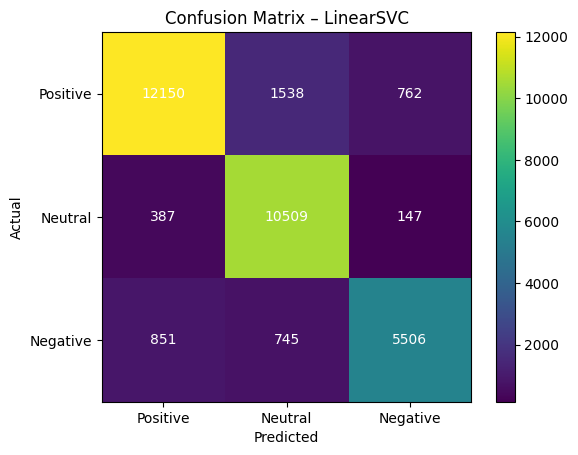

In [21]:
cm = confusion_matrix(y_test, preds_best, labels=['Positive','Neutral','Negative'])
fig, ax = plt.subplots()
im = ax.imshow(cm)
ax.set_xticks(np.arange(3)); ax.set_yticks(np.arange(3))
ax.set_xticklabels(['Positive','Neutral','Negative'])
ax.set_yticklabels(['Positive','Neutral','Negative'])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
ax.set_xlabel('Predicted'); ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix – LinearSVC')
plt.colorbar(im)
plt.show()